# Holiday Package Prediciton

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r"D:\STUDY\MACHINE_LEARNING\10 random forest\Travel.csv")

In [3]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


**DATA CLEANING**
1. HANDLING MISSING VALUES
2. HANDLING DUBLICATES
3. CHECK THE DATA TYPE
4. UNDERSTAND THE DATA SET

In [4]:
# checking for null values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECKING ALL THE CATOGERIES**

In [5]:
features=df.columns
for feature in features:
    print(feature)

CustomerID
ProdTaken
Age
TypeofContact
CityTier
DurationOfPitch
Occupation
Gender
NumberOfPersonVisiting
NumberOfFollowups
ProductPitched
PreferredPropertyStar
MaritalStatus
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
Designation
MonthlyIncome


In [6]:
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
df["Gender"]=df["Gender"].replace("Fe Male", "Female")

In [8]:
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df["MaritalStatus"]=df["MaritalStatus"].replace("Single" , "Unmarried")

In [11]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [12]:
df.shape

(4888, 20)

In [13]:
# removing rows with null values and then checking what is left
df_dropped=df.dropna()
print(df.shape,"---->", df_dropped.shape)

(4888, 20) ----> (4128, 20)


WE will use both data sets and then compare them 

In [14]:

features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,"------>" , df[feature].isnull().sum())

Age ------> 226
TypeofContact ------> 25
DurationOfPitch ------> 251
NumberOfFollowups ------> 45
PreferredPropertyStar ------> 26
NumberOfTrips ------> 140
NumberOfChildrenVisiting ------> 66
MonthlyIncome ------> 233


**IMPUTING NULL VALUES**
1. go through instructions how to handle null values ----> instructions.txt




**AGE**

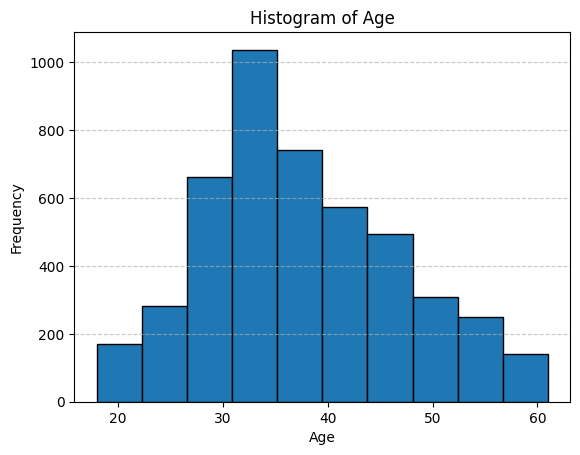

In [15]:
plt.hist(df["Age"], bins=10 , edgecolor="black")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Adnan\AppData\Local\Temp\ipykernel_10928\4283331030.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Age"], shade=True)


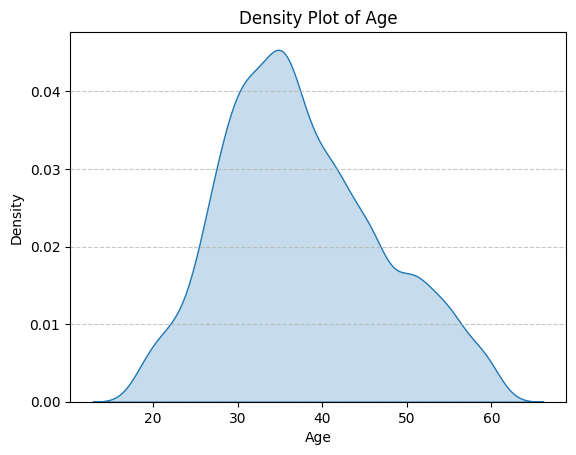

In [16]:
sns.kdeplot(df["Age"], shade=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

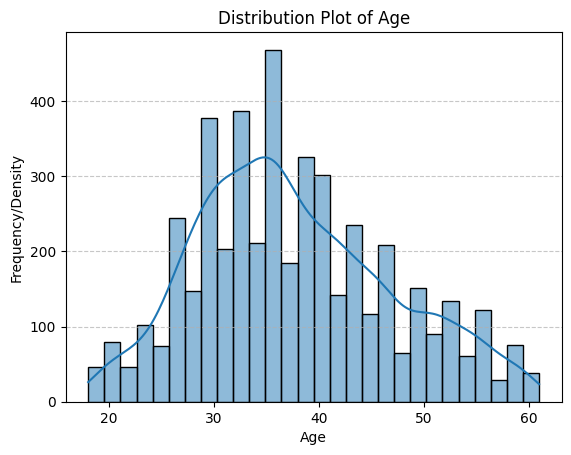

In [17]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency/Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
df["Age"].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

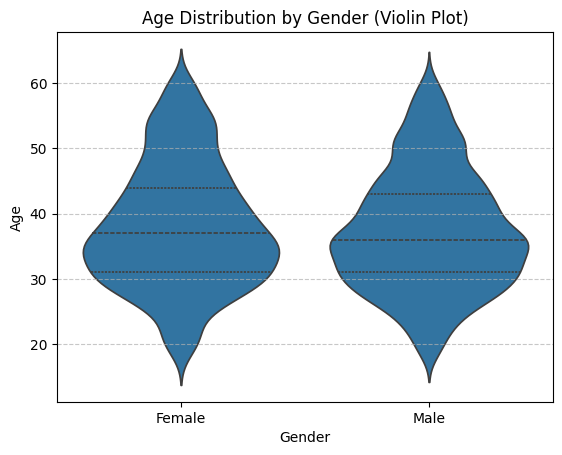

In [19]:
sns.violinplot(x='Gender', y='Age', data=df, inner='quartile')
plt.title('Age Distribution by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

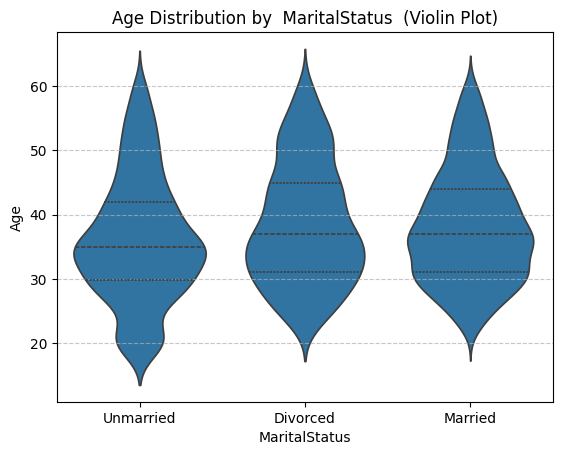

In [20]:
sns.violinplot(x='MaritalStatus', y='Age', data=df, inner='quartile')
plt.title('Age Distribution by  MaritalStatus  (Violin Plot)')
plt.xlabel('MaritalStatus')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

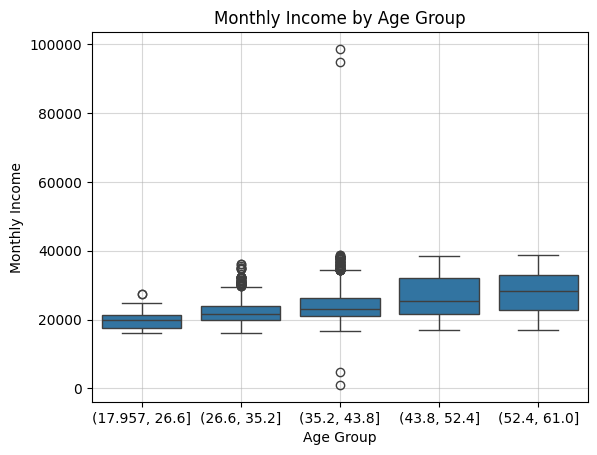

In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=5)
sns.boxplot(x='AgeGroup', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Monthly Income')
plt.grid(alpha=0.5)
plt.show()

The histogram shows that the Age data appears to follow a roughly normal distribution centered around 35, with a standard deviation of approximately 10. This indicates that mean or median could work well for imputation.

In [22]:
df.Age.fillna(df.Age.median(), inplace=True)

C:\Users\Adnan\AppData\Local\Temp\ipykernel_10928\2661029692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)


In [23]:
df["Age"].isnull().sum()

np.int64(0)

**TYPE OF CONTACT**

In [24]:
df["TypeofContact"]

0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
4          Self Enquiry
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4888, dtype: object

In [25]:
print(df["TypeofContact"].isnull().sum())

25


In [26]:
print(df["TypeofContact"].unique())

['Self Enquiry' 'Company Invited' nan]


In [27]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [28]:
df["TypeofContact"].describe()

count             4863
unique               2
top       Self Enquiry
freq              3444
Name: TypeofContact, dtype: object

In [29]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

**DURATIN OF PITCH**

In [30]:
df["DurationOfPitch"].describe()

count    4637.000000
mean       15.490835
std         8.519643
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: DurationOfPitch, dtype: float64